## 对数据集CIC-IDS2017进行模型训练

### 1、数据读取和合并

In [1]:
import pandas as pd
import chardet

# 此文件是为了合并所有文件
file_folder_path = r"C:\\Users\\18270\\Desktop\\ML\\MachineLearningCVE\\"

def get_encoding(file):
    # 二进制方式读取，获取字节数据，检测类型
    with open(file, 'rb') as f:
        return chardet.detect(f.read())['encoding']
        
# 根据file读取数据
def writeData(file):
    print("Loading raw data...{}".format(file))
    return pd.read_csv(file, header=None, low_memory=False)


# 清除CIC-IDS数据集中的脏数据，第一行特征名称和含有Nan、Infiniti等数据的行数
def clearDirtyData(df):
    dropList = df[(df[14] == "Nan") | (df[15] == "Infinity")].index.tolist()
    return dropList

# 按行合并多个Dataframe数据
def mergeData():
    monday = writeData(file_folder_path + "\\Monday-WorkingHours.pcap_ISCX.csv")
    # 剔除第一行属性特征名称
    monday = monday.drop([0])
    tuesday = writeData(file_folder_path + "\\Tuesday-WorkingHours.pcap_ISCX.csv")
    tuesday = tuesday.drop([0])
    thursday_afternoon = writeData(file_folder_path + "\\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
    thursday_afternoon = thursday_afternoon.drop([0])
    thursday_morning = writeData(file_folder_path + "\\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
    thursday_morning = thursday_morning.drop([0])
    wednesday = writeData(file_folder_path + "\\Wednesday-workingHours.pcap_ISCX.csv")
    wednesday = wednesday.drop([0])
    friday_morning = writeData(file_folder_path + "\\Friday-WorkingHours-Morning.pcap_ISCX.csv")
    friday_morning = friday_morning.drop([0])
    friday_afternoon = writeData(file_folder_path + "\\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
    friday_afternoon = friday_afternoon.drop([0])
    friday_work_hours = writeData(file_folder_path + "\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
    friday_work_hours = friday_work_hours.drop([0])
    frame = [monday, friday_morning, friday_afternoon, friday_work_hours, thursday_afternoon, thursday_morning, tuesday,
             wednesday]

    # 合并数据
    result = pd.concat(frame)
    list = clearDirtyData(result)
    result = result.drop(list)
    return result


   

# 数据存一起
raw_data = mergeData()
file = file_folder_path + "/total.csv"
raw_data.to_csv(file, index=False, header=False)

 


Loading raw data...C:\\Users\\18270\\Desktop\\ML\\MachineLearningCVE\\\Monday-WorkingHours.pcap_ISCX.csv
Loading raw data...C:\\Users\\18270\\Desktop\\ML\\MachineLearningCVE\\\Tuesday-WorkingHours.pcap_ISCX.csv
Loading raw data...C:\\Users\\18270\\Desktop\\ML\\MachineLearningCVE\\\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Loading raw data...C:\\Users\\18270\\Desktop\\ML\\MachineLearningCVE\\\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Loading raw data...C:\\Users\\18270\\Desktop\\ML\\MachineLearningCVE\\\Wednesday-workingHours.pcap_ISCX.csv
Loading raw data...C:\\Users\\18270\\Desktop\\ML\\MachineLearningCVE\\\Friday-WorkingHours-Morning.pcap_ISCX.csv
Loading raw data...C:\\Users\\18270\\Desktop\\ML\\MachineLearningCVE\\\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Loading raw data...C:\\Users\\18270\\Desktop\\ML\\MachineLearningCVE\\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv


#### 查看数据

In [2]:
#查看分类以及数量
last_column_index = raw_data.shape[1] - 1
print(raw_data[last_column_index].value_counts())

78
BENIGN                        2260360
DoS Hulk                       229198
PortScan                       157703
DDoS                           127082
DoS GoldenEye                   10289
FTP-Patator                      7894
SSH-Patator                      5861
DoS slowloris                    5771
DoS Slowhttptest                 5485
Bot                              1943
Web Attack � Brute Force         1497
Web Attack � XSS                  648
Infiltration                       34
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


#### 查看标签

In [3]:
def lookData(raw_data):
    # 打印数据集的标签数据数量
    # 取出数据集标签部分
    labels = raw_data.iloc[:, raw_data.shape[1] - 1:]

    # 多维数组转为一维数组
    labels = labels.values.ravel()
    label_set = set(labels)
    return label_set

print(lookData(raw_data))

{'Infiltration', 'DDoS', 'DoS Slowhttptest', 'Web Attack � Sql Injection', 'FTP-Patator', 'Heartbleed', 'DoS Hulk', 'DoS GoldenEye', 'BENIGN', 'Web Attack � Brute Force', 'SSH-Patator', 'DoS slowloris', 'PortScan', 'Bot', 'Web Attack � XSS'}


In [4]:
# 查看最后一列（标签）的属性名
last_column_name = raw_data.columns[-1]
print("最后一列的属性名是:", last_column_name)
#可以看到合并后的数据每列的属性名按0~78编号，78是标签target列。其余为特征列

最后一列的属性名是: 78


#### 分析统计图(可以看到原来的数据分布很不平衡)

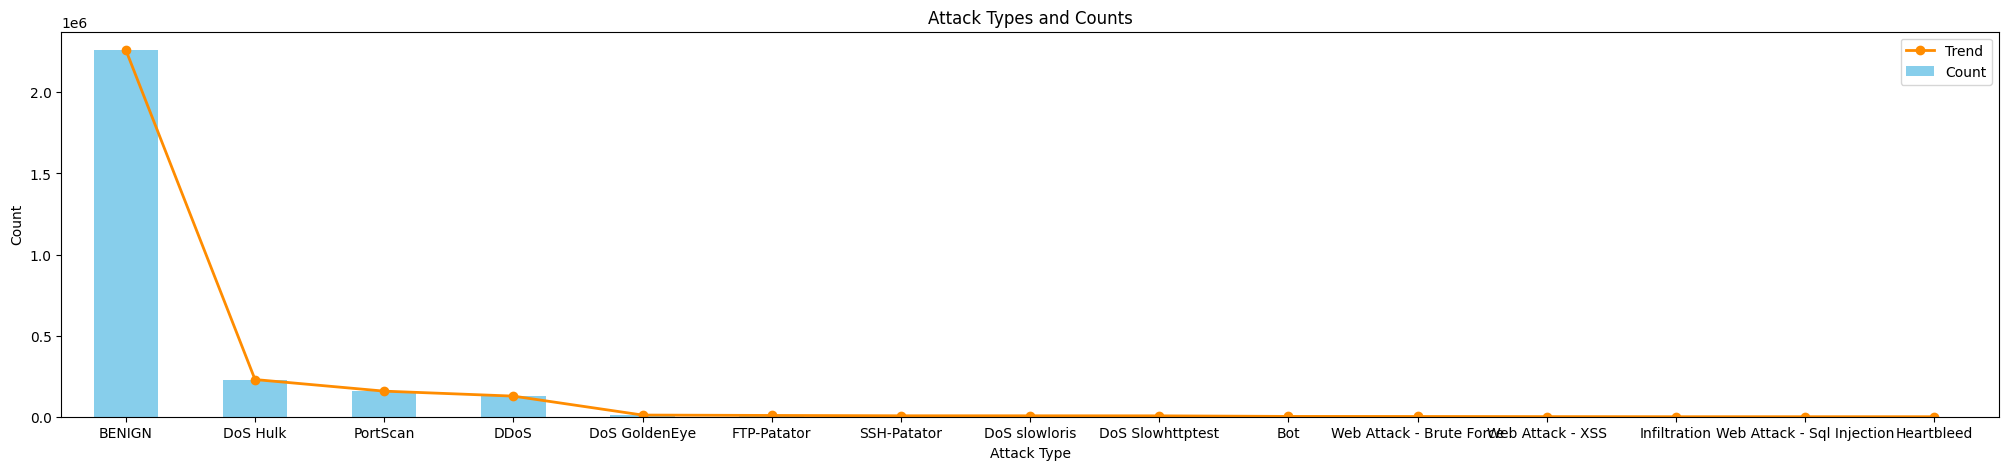

In [45]:
import matplotlib.pyplot as plt

data = {
    'Attack Type': [
        'BENIGN', 'DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye',
        'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest',
        'Bot', 'Web Attack - Brute Force', 'Web Attack - XSS', 'Infiltration',
        'Web Attack - Sql Injection', 'Heartbleed'
    ],
    'Count': [
        2260360, 229198, 157703, 127082, 10289, 7894, 5861, 5771, 5485,
        1943, 1497, 648, 34, 21, 11
    ]
}
# 创建DataFrame
df_ps = pd.DataFrame(data)

# 设置图形大小
plt.figure(figsize=(25, 5))

# 绘制直方图
df_ps.set_index('Attack Type')['Count'].plot(kind='bar', color='skyblue', label='Count', rot=0)

# 绘制折线图
df_ps.set_index('Attack Type')['Count'].plot(kind='line', marker='o', color='darkorange', linewidth=2, label='Trend')

# 设置标题和标签
plt.title('Attack Types and Counts')
plt.xlabel('Attack Type')
plt.ylabel('Count')

# 添加图例
plt.legend()

# 显示图形
plt.show()

#### 饼状图可视化

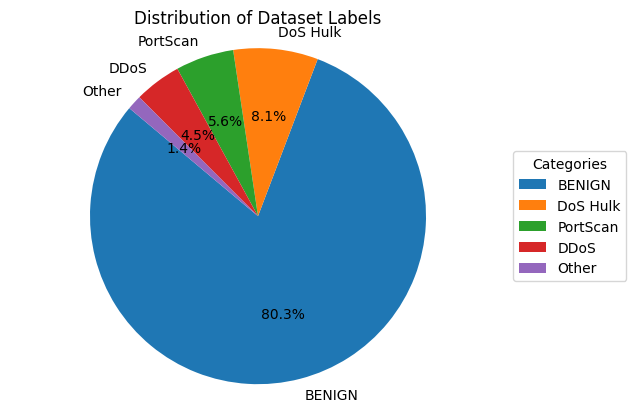

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# 已知的数据集标签列的属性值及其数量
data = {
    'Category': [
        'BENIGN', 'DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye',
        'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest',
        'Bot', 'Web Attack - Brute Force', 'Web Attack - XSS', 'Infiltration',
        'Web Attack - Sql Injection', 'Heartbleed'
    ],
    'Count': [
        2260360, 229198, 157703, 127082, 10289, 7894, 5861, 5771, 5485,
        1943, 1497, 648, 34, 21, 11
    ]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 将数量较少的部分归为“其他”
threshold = 20000  # 设置阈值
other_categories = df[(df['Count'] < threshold)]['Category'].tolist()
other_count = df[(df['Count'] < threshold)]['Count'].sum()
df = df[df['Count'] >= threshold]

# 添加“其他”类别
df.loc[len(df)] = ['Other', other_count]

# 绘制饼状图
fig, ax = plt.subplots()
ax.pie(df['Count'], labels=df['Category'], autopct='%1.1f%%', startangle=140)

# 确保饼状图是圆形的
ax.axis('equal')

# 添加图例
plt.legend(df['Category'], title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# 显示图表
plt.title('Distribution of Dataset Labels')
plt.show()

### 2、数据预处理

#### 由于总数据量过大且分布很不平衡，抽取样本减少数据量，采用过采样和欠采样（随机）使正常数据（BENIGH）：异常网络攻击数据≈7：3

In [19]:
#数据量太大且数据分布很不平衡
import pandas as pd
import numpy as np

# 读取数据
df = raw_data

# 数据清洗
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# 初始化空的DataFrame来存储样本
sample_df = pd.DataFrame()

# 抽取BENIGN类别的样本
benign_samples = df[df[78] == 'BENIGN'].sample(n=100000, random_state=42)
sample_df = pd.concat([sample_df, benign_samples], axis=0)

# 抽取其他类别的样本
for label in df[78].unique():
    if label == 'BENIGN':
        continue
    label_samples = df[df[78] == label]
    n_samples = min(len(label_samples), 3000)
    if len(label_samples) < 3000:
        # 过采样至3000条
        label_samples = label_samples.sample(n=3000, replace=True, random_state=42)
    else:
        label_samples = label_samples.sample(n=3000, random_state=42)
    sample_df = pd.concat([sample_df, label_samples], axis=0)

#查看抽取后的分类以及数量
last_column_index = sample_df.shape[1] - 1
print(sample_df[last_column_index].value_counts())

78
BENIGN                        100000
Bot                             3000
PortScan                        3000
DDoS                            3000
Infiltration                    3000
Web Attack � Brute Force        3000
Web Attack � XSS                3000
Web Attack � Sql Injection      3000
FTP-Patator                     3000
SSH-Patator                     3000
DoS slowloris                   3000
DoS Slowhttptest                3000
DoS Hulk                        3000
DoS GoldenEye                   3000
Heartbleed                      3000
Name: count, dtype: int64


#### 将抽取的样本存到sample.csv

In [20]:
# 打乱样本顺序
sample_df = sample_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 保存到新的CSV文件
sample_df.to_csv('sample.csv', index=False)

#### 将不同的网络攻击类型分类，减少类别

In [31]:
import pandas as pd
import numpy as np
# 根据file读取数据
def writeData(file):
    print("Loading raw data...{}".format(file))
    return pd.read_csv(file, header=None, low_memory=False)
    
df = writeData('sample.csv')
#  使用replace方法替换标签列中的值,主要把数据集进行分类大类
df[78] = df[78].replace(['Web Attack � Brute Force','Web Attack � XSS','Web Attack � Sql Injection'], 'Web Attack')

df[78] = df[78].replace(['DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk','DoS GoldenEye'], 'DoS Attacks')

df[78] = df[78].replace(['FTP-Patator', 'SSH-Patator'], 'Brute Force Attacks')

df[78] = df[78].replace([ 'Infiltration'], 'Infiltration Attacks')

df[78] = df[78].replace([ 'PortScan'], 'Port Scan Attacks')

df[78] = df[78].replace([ 'Bot'], 'Botnet Attacks')

df[78] = df[78].replace([ 'DDoS'], 'DDoS Attacks')

df[78] = df[78].replace([ 'Heartbleed'], 'Heartbleed Attacks')



Loading raw data...sample.csv


In [32]:
print('=======================================查看数据的label分布情况==========================')
print(df[78].unique())

#查看分类后的分类以及数量
last_column_index = df.shape[1] - 1
print(df[last_column_index].value_counts().drop(labels=['78'], errors='ignore'))

=======================================查看数据的label分布情况==========================
['78' 'BENIGN' 'DoS Attacks' 'Botnet Attacks' 'Port Scan Attacks'
 'Web Attack' 'DDoS Attacks' 'Infiltration Attacks' 'Brute Force Attacks'
 'Heartbleed Attacks']
78
BENIGN                  100000
DoS Attacks              12000
Web Attack                9000
Brute Force Attacks       6000
Botnet Attacks            3000
Port Scan Attacks         3000
DDoS Attacks              3000
Infiltration Attacks      3000
Heartbleed Attacks        3000
Name: count, dtype: int64


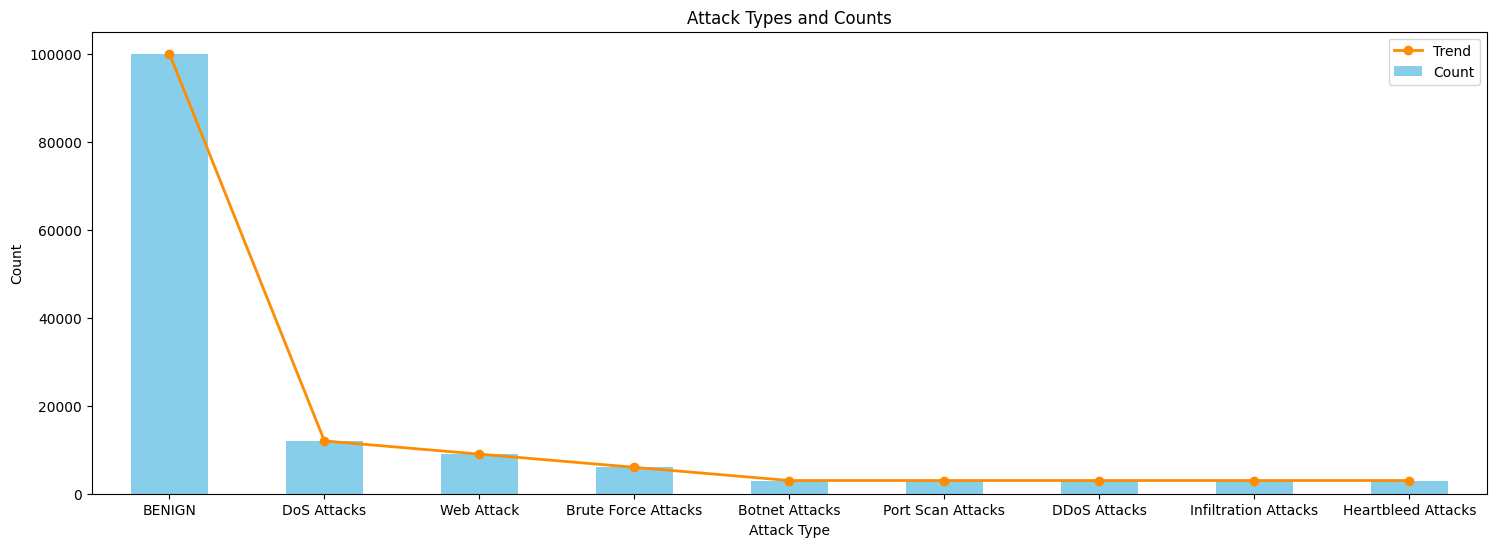

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 定义数据
data = {
    'Attack Type': ['BENIGN', 'DoS Attacks', 'Web Attack', 'Brute Force Attacks', 'Botnet Attacks',
                   'Port Scan Attacks', 'DDoS Attacks', 'Infiltration Attacks', 'Heartbleed Attacks'],
    'Count': [100000, 12000, 9000, 6000, 3000, 3000, 3000, 3000, 3000]
}

# 创建DataFrame
df_p = pd.DataFrame(data)

# 设置图形大小
plt.figure(figsize=(18, 6))

# 绘制直方图
df_p.set_index('Attack Type')['Count'].plot(kind='bar', color='skyblue', label='Count', rot=0)

# 绘制折线图
df_p.set_index('Attack Type')['Count'].plot(kind='line', marker='o', color='darkorange', linewidth=2, label='Trend')

# 设置标题和标签
plt.title('Attack Types and Counts')
plt.xlabel('Attack Type')
plt.ylabel('Count')

# 添加图例
plt.legend()

# 显示图形
plt.show()

#### PCA降维(原数据集有78个特征列)

           0          1    2    3       4      5     6   7           8   \
1       57512         72    1    1       6      6     6   6    6.000000   
2          80   99514715    9    6     337  11595   337   0   37.444444   
3       54621         24    1    1       6      6     6   6    6.000000   
4       53888         46    1    1       6      6     6   6    6.000000   
5          53      51172    2    2      90    164    45  45   45.000000   
...       ...        ...  ...  ...     ...    ...   ...  ..         ...   
141996    444  116393329  504  504  171452   3024  1027   6  340.182540   
141997     80    5006168    4    4     599   2021   599   0  149.750000   
141998   9943         44    1    1       2      6     2   2    2.000000   
141999     80   63114853    7    0       0      0     0   0    0.000000   
142000     21        211    2    1      14      0    14   0    7.000000   

                9   ...   68  69          70   71        72        73  \
1         0.000000  ...   

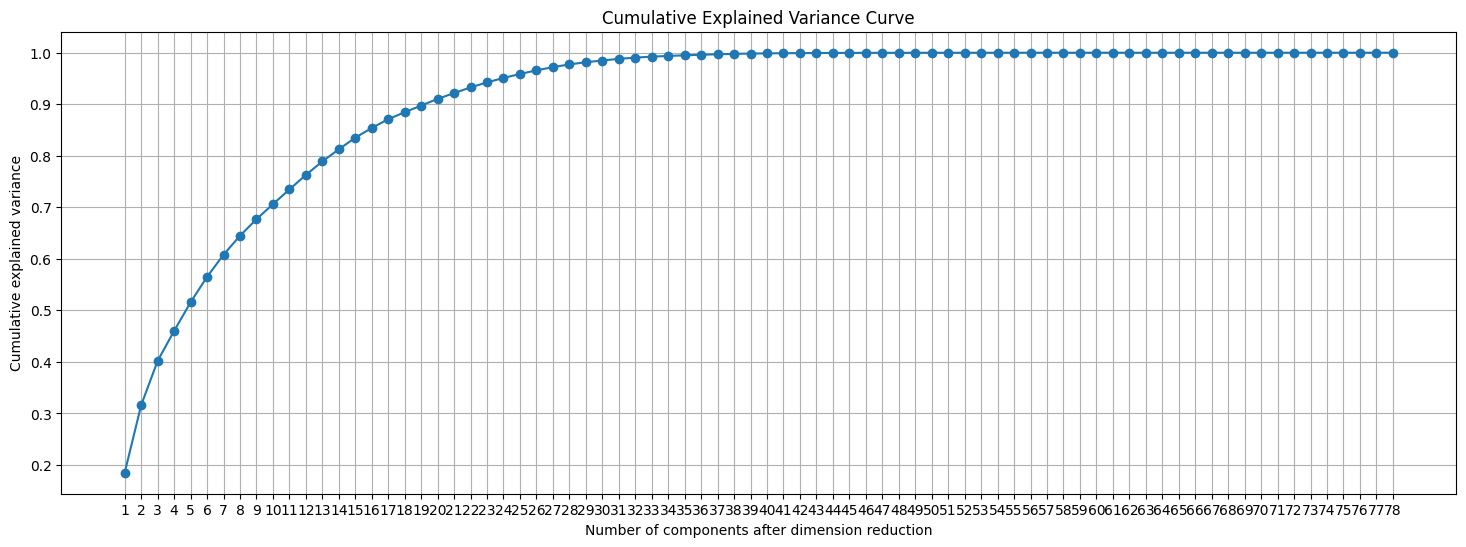

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
df_p=df
X = df_p.iloc[1:, :-1]  # 所有行，除了最后一列的数据
y = df_p.iloc[1:, -1]  # 所有行的最后一列数据
print(pd.DataFrame(X))


# 标准化特征（对于KNN和某些其他算法很重要）
scaler = StandardScaler()
X = scaler.fit_transform(X)


# 调用PCA
pca = PCA(n_components=34)  # 实例化 此处使用34代表降维到34个特征值，也可取mle让程序使用最大似然估计自己找寻最合适的降维超参数
pca = pca.fit(X)  # 拟合模型
X_dr = pca.transform(X)  # 获取新矩阵
# X_dr = PCA(2).fit_transform(X)  # 同上两步



# 查看降维后每个新特征向量上所带的信息量大小，即方差大小
print(pca.explained_variance_)

# 查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
# 又叫可解释性方差贡献率
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

# 累计可解释方差贡献率曲线来选择最好的n_components
pca_line = PCA().fit(X)
plt.figure(figsize=(18, 6))  # 设置图像大小
plt.plot(np.arange(1, X.shape[1]+1), np.cumsum(pca_line.explained_variance_ratio_), marker='o')
plt.xticks(np.arange(1, X.shape[1]+1))  # 设置x轴刻度
plt.xlabel("Number of components after dimension reduction")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative Explained Variance Curve")
plt.grid(True)
plt.show()


##### 可以看到当n_components为34左右时，曲线开始趋于平缓。在34这个点，增加更多的主成分对解释数据方差的贡献很小，因此没有必要

In [11]:
print(X_dr)
print(X_dr.shape)
print(y)

[[-1.89438861 -0.0271771   0.26400426 ...  0.05481638  0.0330021
  -0.36541228]
 [-2.01945895 -0.13377177  0.50087007 ... -0.30233719  0.04004309
   0.29981234]
 [-1.78611528 -0.02643916  0.10656297 ...  0.27491538 -0.00485716
   0.28627424]
 ...
 [-1.83767461  0.10518243  0.17416094 ...  0.0223341  -0.00909683
  -0.03303249]
 [-2.19754798 -0.17378714  0.58428363 ... -0.10046299  0.30316495
   0.26209137]
 [ 0.03686589  1.61739659 -1.3772072  ... -0.43113467 -0.0643572
   0.17620328]]
(284000, 34)
1                    BENIGN
2                    BENIGN
3         Port Scan Attacks
4              DDoS Attacks
5                    BENIGN
                ...        
283996               BENIGN
283997          DoS Attacks
283998               BENIGN
283999               BENIGN
284000               BENIGN
Name: 78, Length: 284000, dtype: object


In [24]:
X

array([[ 2.90673696, -0.47648424, -0.08876827, ..., -0.1659572 ,
        -0.338869  , -0.29768075],
       [-0.40551626,  2.31343914, -0.08005598, ..., -0.1659572 ,
         4.44980908,  4.90988   ],
       [ 2.74000545, -0.47648559, -0.08876827, ..., -0.1659572 ,
        -0.338869  , -0.29768075],
       ...,
       [ 0.16330867, -0.47648503, -0.08876827, ..., -0.1659572 ,
        -0.338869  , -0.29768075],
       [-0.40551626,  1.2929579 , -0.08223405, ...,  2.48269884,
         1.20757533,  0.12185544],
       [-0.40891894, -0.47648035, -0.08767923, ..., -0.1659572 ,
        -0.338869  , -0.29768075]])

### 3、划分训练集和测试集

In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
 
# 读取数据
#df1=df
#df1=X_dr

#X = df1.iloc[1:, :-1]  # 所有行，除了最后一列的数据


#划分比例是0.7和0.3
x_train, x_test, y_train, y_test = train_test_split(X_dr, y, test_size=0.3, random_state=42)

In [36]:
print(x_test)
print(x_test.shape)

[[ 0.51987366  2.18031316 -1.76613758 ... -0.7784818   0.17673777
   0.1417534 ]
 [-1.88442312 -0.02399176  0.23667629 ...  0.03155841  0.01790267
  -0.18656433]
 [-1.67176511 -0.24011844  0.19029162 ...  0.16779863  0.19374144
   0.05182922]
 ...
 [-1.88731493 -0.05747034  0.24970312 ...  0.01976152  0.03618094
  -0.19403544]
 [-1.44397121  0.14324858 -0.09738908 ...  0.27069661 -0.17912783
   0.09595529]
 [-2.24379892 -0.24491783  0.58148106 ... -0.18794279 -0.14869766
  -0.09787551]]
(42600, 34)


### 4、模型构建和训练

#### 利用python的机器学习库训练模型（决策树、随机森林、KNN、朴素贝叶斯）

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# 假设X和y是您的特征和标签
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 标准化特征（对于KNN和某些其他算法很重要）
X_train = x_train
X_test = x_test

# 定义决策树的超参数搜索空间
param_grid_tree = {
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}

# 定义随机森林的超参数搜索空间
param_grid_rf = {
    'n_estimators': [10, 20],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy'],
    'random_state': [0]
}

# 初始化分类器
decision_tree = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

# 使用网格搜索找到最优的决策树参数
grid_search_tree = GridSearchCV(decision_tree, param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

# 使用网格搜索找到最优的随机森林参数
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# 打印最优参数
print("最优决策树参数:", grid_search_tree.best_params_)
print("最优随机森林参数:", grid_search_rf.best_params_)

# 使用最优参数训练模型
best_decision_tree = grid_search_tree.best_estimator_
best_rf_classifier = grid_search_rf.best_estimator_

best_decision_tree.fit(X_train, y_train)
best_rf_classifier.fit(X_train, y_train)

# 预测测试集
y_pred_tree = best_decision_tree.predict(X_test)
y_pred_rf = best_rf_classifier.predict(X_test)

print("\n最优决策树性能:")
print(accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

print("\n最优随机森林性能:")
print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

最优决策树参数: {'criterion': 'entropy', 'max_depth': None, 'random_state': 42}
最优随机森林参数: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 20, 'random_state': 0}

最优决策树性能:
0.9916197183098592
                      precision    recall  f1-score   support

              BENIGN       0.99      0.99      0.99     29974
      Botnet Attacks       0.95      0.97      0.96       909
 Brute Force Attacks       1.00      0.99      0.99      1743
        DDoS Attacks       0.99      0.99      0.99       941
         DoS Attacks       0.99      0.99      0.99      3600
  Heartbleed Attacks       1.00      1.00      1.00       888
Infiltration Attacks       1.00      1.00      1.00       893
   Port Scan Attacks       0.94      0.91      0.92       914
          Web Attack       0.99      1.00      1.00      2738

            accuracy                           0.99     42600
           macro avg       0.98      0.98      0.98     42600
        weighted avg       0.99      0.99      0.99     42600


In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 假设x_train, x_test, y_train, y_test是您的特征和标签
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = x_train
X_test = x_test

# 定义KNN的超参数搜索空间
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 定义高斯朴素贝叶斯的超参数搜索空间
param_grid_bayes = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# 初始化分类器
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

# 使用网格搜索找到最优的KNN参数
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# 使用网格搜索找到最优的高斯朴素贝叶斯参数
grid_search_bayes = GridSearchCV(naive_bayes, param_grid_bayes, cv=5, scoring='accuracy')
grid_search_bayes.fit(X_train, y_train)

# 打印最优参数
print("最优KNN参数:", grid_search_knn.best_params_)
print("最优高斯朴素贝叶斯参数:", grid_search_bayes.best_params_)

# 使用最优参数训练模型
best_knn = grid_search_knn.best_estimator_
best_bayes = grid_search_bayes.best_estimator_

best_knn.fit(X_train, y_train)
best_bayes.fit(X_train, y_train)

# 预测测试集
y_pred_knn = best_knn.predict(X_test)
y_pred_bayes = best_bayes.predict(X_test)

# 评估模型性能
print("\n最优KNN性能:")
print(accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

print("\n最优高斯朴素贝叶斯性能:")
print(accuracy_score(y_test, y_pred_bayes))
print(classification_report(y_test, y_pred_bayes))

d:\Program Files\python39\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Program Files\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "d:\Program Files\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "d:\Program Files\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "d:\Program Files\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "d:\Program Files\python39\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

最优KNN参数: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
最优高斯朴素贝叶斯参数: {'var_smoothing': 1e-09}

最优KNN性能:
0.9892018779342723
                      precision    recall  f1-score   support

              BENIGN       0.99      0.99      0.99     29974
      Botnet Attacks       0.91      0.98      0.94       909
 Brute Force Attacks       0.99      0.99      0.99      1743
        DDoS Attacks       0.99      0.99      0.99       941
         DoS Attacks       0.99      0.99      0.99      3600
  Heartbleed Attacks       1.00      1.00      1.00       888
Infiltration Attacks       0.99      1.00      1.00       893
   Port Scan Attacks       0.88      0.85      0.86       914
          Web Attack       0.99      1.00      1.00      2738

            accuracy                           0.99     42600
           macro avg       0.97      0.98      0.97     42600
        weighted avg       0.99      0.99      0.99     42600


最优高斯朴素贝叶斯性能:
0.6802582159624413
                 

#### 神经网络MLP模型

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

# 定义参数网格
param_grid = {
    'hidden_layer_sizes': [(50,), (10, 10), (50,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500, 1000]
}

# 构建分类器
mlp = MLPClassifier()

# 使用GridSearchCV进行自动调参
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', verbose=10, n_jobs=-1)

# 训练模型
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳分数
print("最佳参数:", grid_search.best_params_)
print("最佳分数:", grid_search.best_score_)

# 使用最佳参数的模型进行预测
best_mlp = grid_search.best_estimator_
y_train_pred = best_mlp.predict(X_train)
y_test_pred = best_mlp.predict(X_test)

# 打印性能报告
print("MLP 性能:")
print(accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
最佳参数: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
最佳分数: 0.9765995975855131
MLP 性能:
0.9752347417840376
                      precision    recall  f1-score   support

              BENIGN       0.99      0.98      0.99     29974
      Botnet Attacks       0.86      0.98      0.92       909
 Brute Force Attacks       0.88      0.96      0.91      1743
        DDoS Attacks       0.99      0.98      0.98       941
         DoS Attacks       0.99      0.97      0.98      3600
  Heartbleed Attacks       1.00      1.00      1.00       888
Infiltration Attacks       1.00      0.97      0.98       893
   Port Scan Attacks       0.82      0.89      0.86       914
          Web Attack       0.94      0.92      0.93      2738

            accuracy                           0.98     42600
           macro avg       0.94      0.96      0.95     42600
        weight

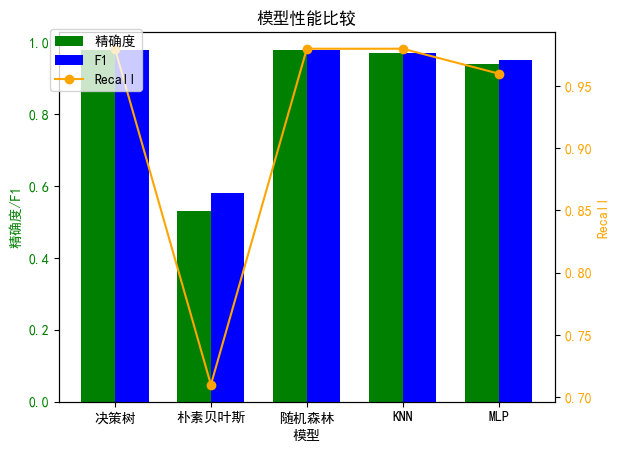

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# 设置Matplotlib支持中文的字体，这里使用的是'SimHei'字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 'SimHei'是黑体的意思
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号

# 数据
models = ['决策树', '朴素贝叶斯', '随机森林', 'KNN', 'MLP']
precision = [0.98, 0.53, 0.98, 0.97, 0.94]
f1_scores = [0.98, 0.58, 0.98, 0.97, 0.95]
recall = [0.98, 0.71, 0.98, 0.98, 0.96]

# 创建图表和轴
fig, ax1 = plt.subplots()

# 绘制精确度/F1分数的柱状图
width = 0.35  # 柱状图的宽度
x = np.arange(len(models))  # x轴的位置
ax1.bar(x - width/2, precision, width, label='精确度', color='green')
ax1.bar(x + width/2, f1_scores, width, label='F1', color='blue')

# 设置轴标签和标题
ax1.set_xlabel('模型')
ax1.set_ylabel('精确度/F1', color='green')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.tick_params(axis='y', labelcolor='green')

# 创建第二个Y轴并绘制折线图
ax2 = ax1.twinx()
ax2.plot(x, recall, color='orange', marker='o', label='Recall')
ax2.set_ylabel('Recall', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 添加图例
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# 显示图表
plt.title('模型性能比较')
plt.show()

#### 绘制不同模型的混淆矩阵

KNN 混淆矩阵如下:



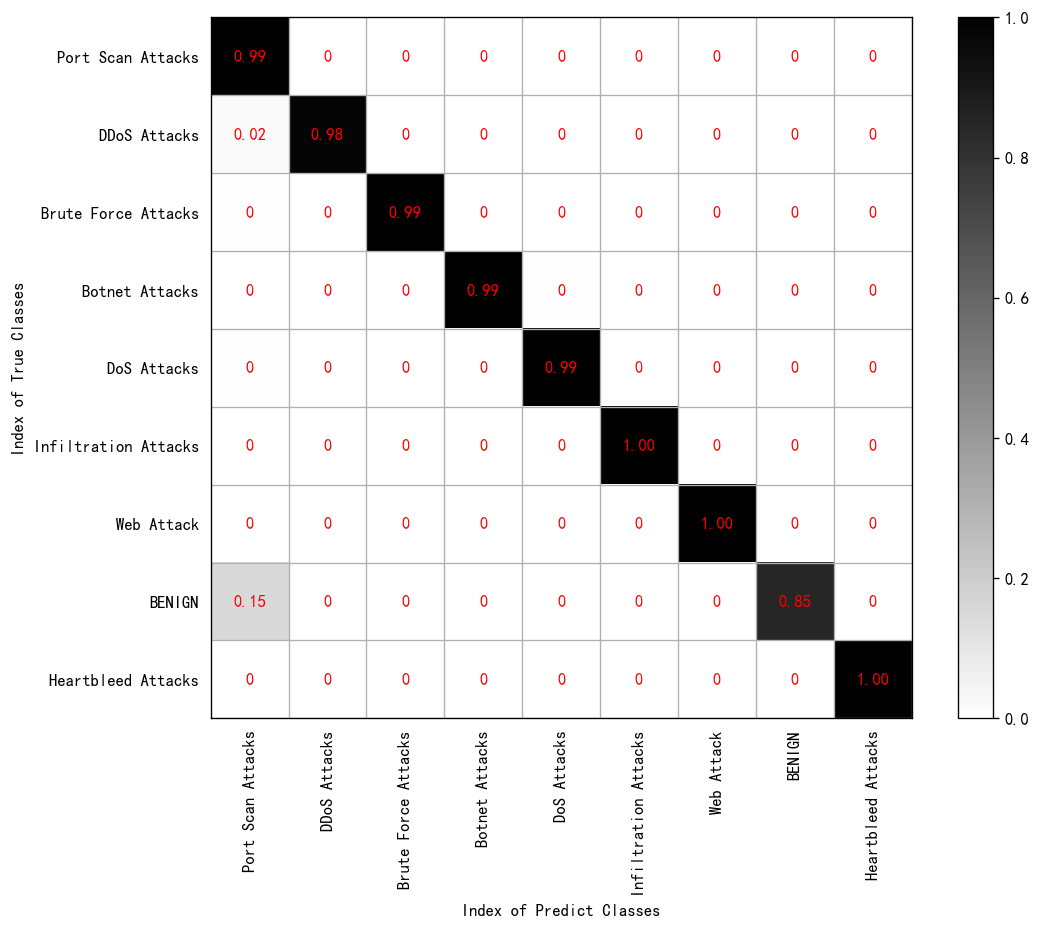




决策树 混淆矩阵如下:



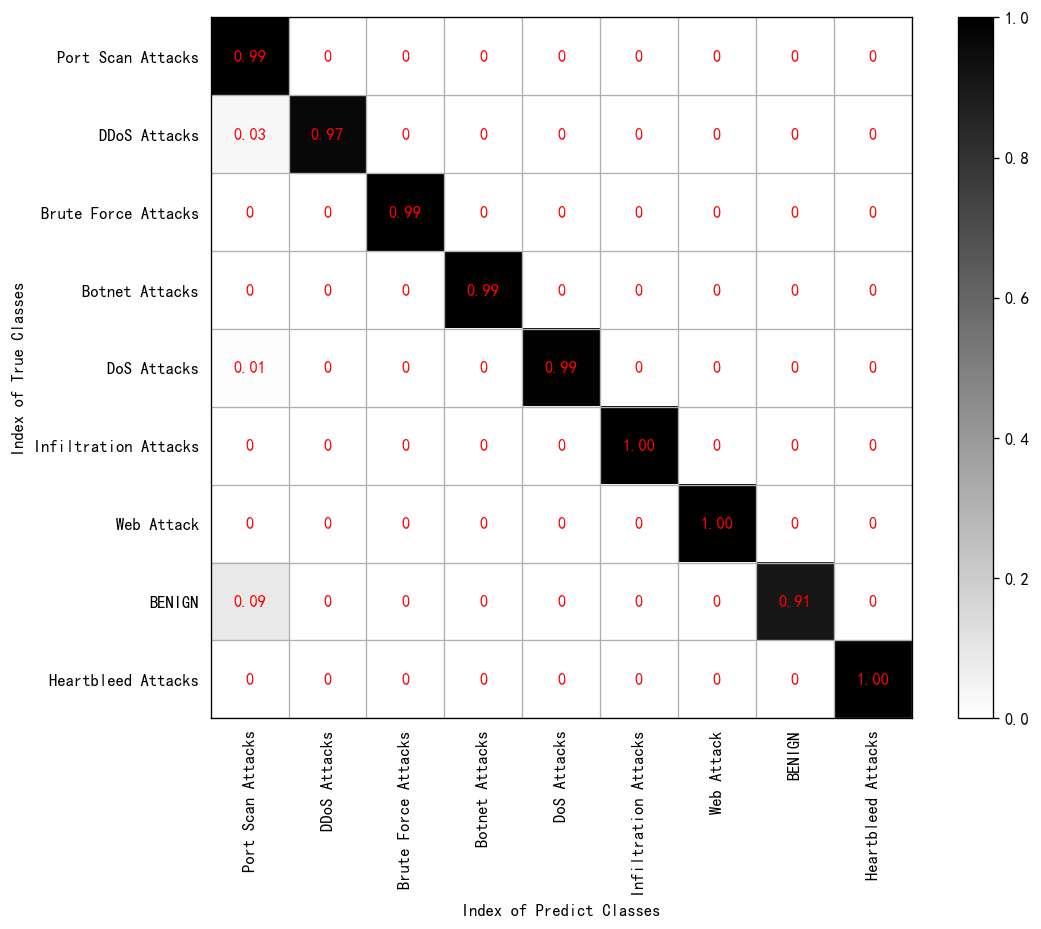




朴素贝叶斯 混淆矩阵如下:



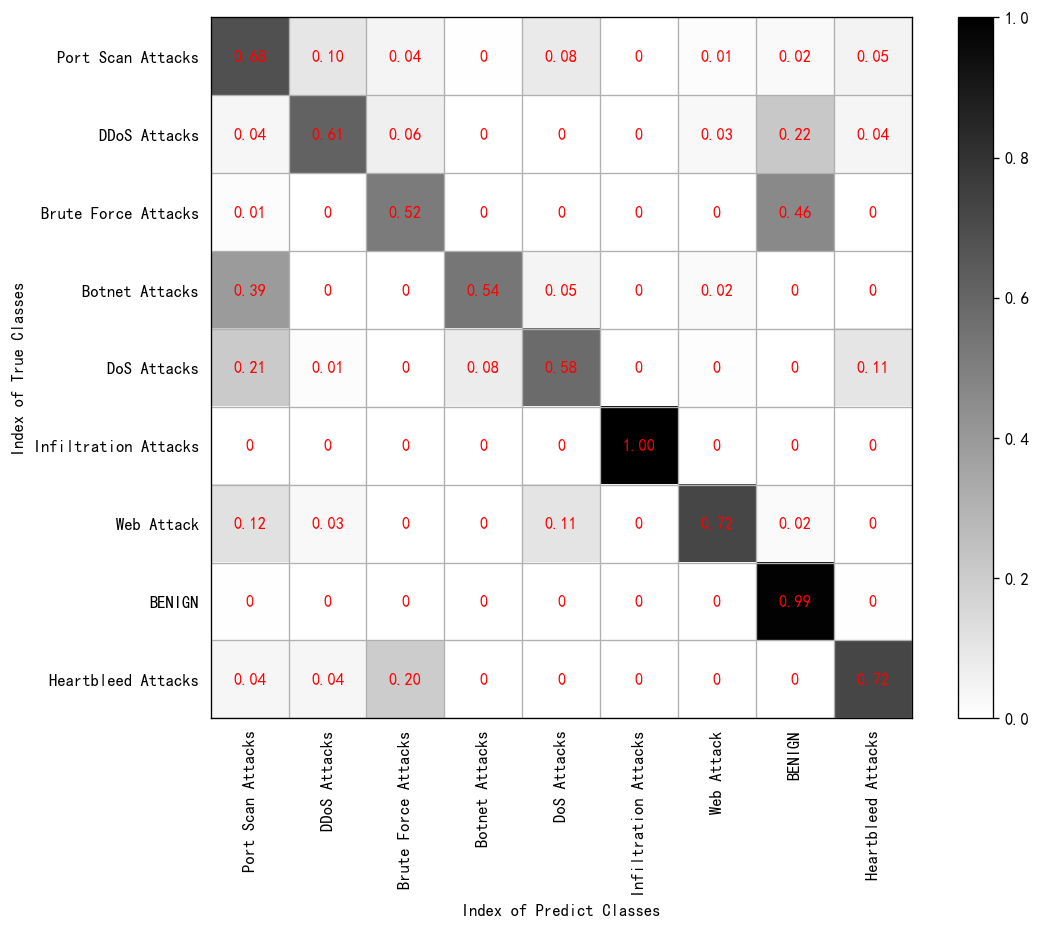




RandomForest 混淆矩阵如下:



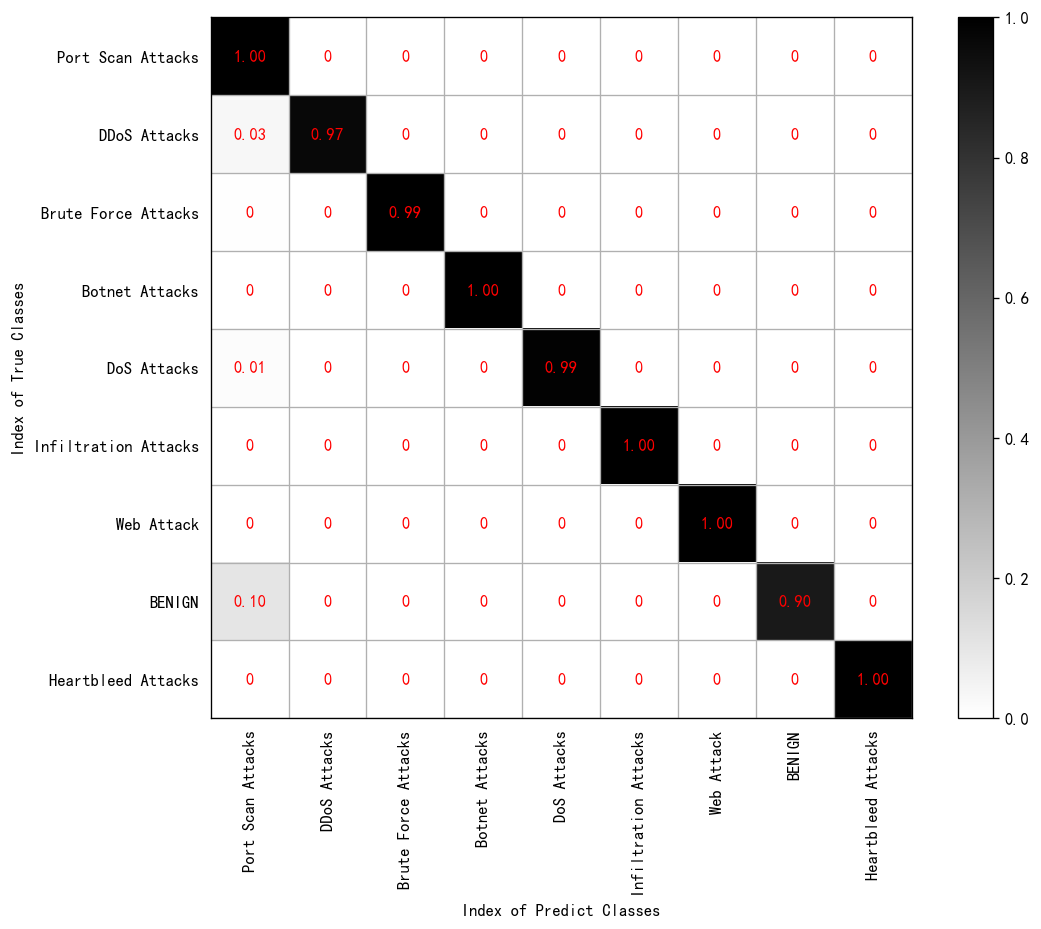




MLP 混淆矩阵如下:



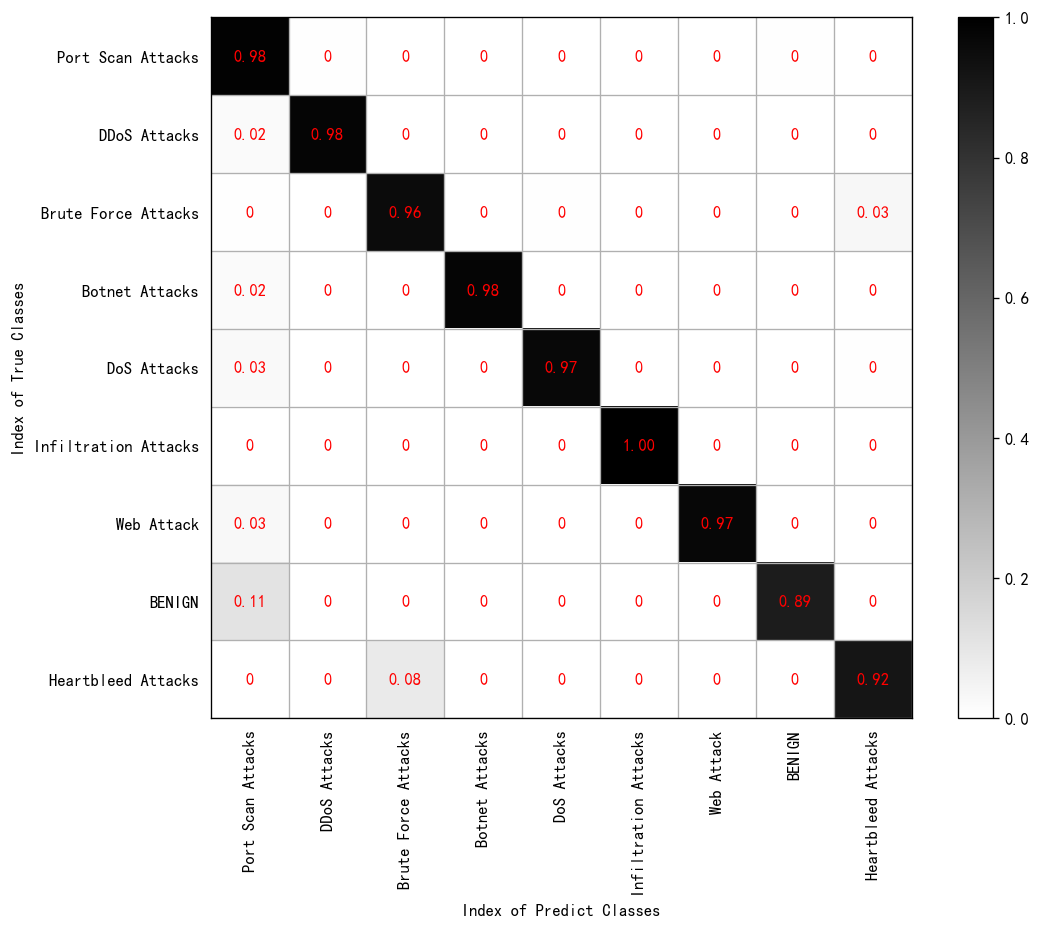

In [59]:
#绘制混淆矩阵
def plot_confusion_matrix(y_true, y_pred, labels):
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    cmap = plt.cm.binary
    cm = confusion_matrix(y_true, y_pred)
    tick_marks = np.array(range(len(labels))) + 0.5
    np.set_printoptions(precision=2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8), dpi=120)
    ind_array = np.arange(len(labels))
    x, y = np.meshgrid(ind_array, ind_array)
    intFlag = 0 # 标记在图片中对文字是整数型还是浮点型
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        #

        if (intFlag):
            c = cm[y_val][x_val]
            plt.text(x_val, y_val, "%d" % (c,), color='red', fontsize=8, va='center', ha='center')

        else:
            c = cm_normalized[y_val][x_val]
            if (c > 0.01):
                #这里是绘制数字，可以对数字大小和颜色进行修改
                plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=10, va='center', ha='center')
            else:
                plt.text(x_val, y_val, "%d" % (0,), color='red', fontsize=10, va='center', ha='center')
    if(intFlag):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
    else:
        plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.title('')
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('Index of True Classes')
    plt.xlabel('Index of Predict Classes')
    plt.savefig('confusion_matrix.jpg', dpi=300)
    plt.show()

labels=['Port Scan Attacks', 'DDoS Attacks', 'Brute Force Attacks', 'Botnet Attacks',
        'DoS Attacks', 'Infiltration Attacks', 'Web Attack', 'BENIGN', 'Heartbleed Attacks']
print("KNN 混淆矩阵如下:\n")
plot_confusion_matrix(y_test,y_pred_knn, labels)
print("\n\n")

print("决策树 混淆矩阵如下:\n")
plot_confusion_matrix(y_test,y_pred_tree, labels)
print("\n\n")

print("朴素贝叶斯 混淆矩阵如下:\n")
plot_confusion_matrix(y_test,y_pred_bayes, labels)
print("\n\n")

print("RandomForest 混淆矩阵如下:\n")
plot_confusion_matrix(y_test,y_pred_rf, labels)
print("\n\n")

print("MLP 混淆矩阵如下:\n")
plot_confusion_matrix(y_test,y_test_pred, labels)
print("\n\n")
